### Importing Libraries and Preprocessing the Data

In [1]:
#Importing Packages
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from sklearn.linear_model import LinearRegression
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
# Reading The CSV File and storing it in Pandas Dataframe
import pandas as pd
test1 = pd.read_csv('C:/Users/patel/ML_for_data_analytics_lab/Assignment2/GoodReads/my_goodreads_test.csv/my_goodreads_test.csv')
train1 = pd.read_csv('C:/Users/patel/ML_for_data_analytics_lab/Assignment2/GoodReads/my_goodreads_train.csv/my_goodreads_train.csv')

In [4]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700000 entries, 0 to 699999
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       700000 non-null  object
 1   book_id       700000 non-null  int64 
 2   review_id     700000 non-null  object
 3   rating        700000 non-null  int64 
 4   review_text   700000 non-null  object
 5   date_added    700000 non-null  object
 6   date_updated  700000 non-null  object
 7   read_at       628588 non-null  object
 8   started_at    486589 non-null  object
 9   n_votes       700000 non-null  int64 
 10  n_comments    700000 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 58.7+ MB


In [5]:
train1['review_id'].isnull().sum()

0

In [6]:
# Load the data
# Load the dataset
X_train = train1
X_test = test1[['n_votes', 'n_comments', 'review_text']]

In [7]:
# Split the data into training and testing sets
train_data, valid_data, train_labels, valid_labels = train_test_split(X_train[['n_votes', 'n_comments', 'review_text']], X_train['rating'], test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=50)
train_vectors = vectorizer.fit_transform(train_data['review_text'])
valid_vectors = vectorizer.transform(valid_data['review_text'])
test_vectors = vectorizer.transform(X_test['review_text'])


# Combine the text vectors with the numerical features
from scipy.sparse import hstack
train_vectors = hstack([train_vectors, train_data[['n_votes', 'n_comments']]])
valid_vectors = hstack([valid_vectors, valid_data[['n_votes', 'n_comments']]])
test_vectors = hstack([test_vectors, X_test[['n_votes', 'n_comments']]])

### Standard ML Baseline Model - Linear Regression

In [8]:
# Train the linear regression model
model = LinearRegression()
model.fit(train_vectors, train_labels)


LinearRegression()

In [9]:
# Evaluate the model on the validation set
score = model.score(valid_vectors, valid_labels)
print("Linear Regression Accuracy:", score)

Linear Regression Accuracy: 0.10232914273425131


In [ ]:
# Make predictions on the validation set
valid_predictions = model.predict(valid_vectors)

# Calculate the mean squared error and mean absolute error
mse = mean_squared_error(valid_labels, valid_predictions)
mae = mean_absolute_error(valid_labels, valid_predictions)

# Calculate the mean and standard deviation
mean = np.mean(valid_predictions)
std = np.std(valid_predictions)

print("Linear Regression MSE:", mse)
print("Linear Regression MAE:", mae)
print("Linear Regression Mean:", mean)
print("Linear Regression Standard Deviation:", std)

### 3Layer NN Baseline

Number of neurons: 16, Valid accuracy: 1.1650863885879517
Number of neurons: 32, Valid accuracy: 1.1698086261749268
Number of neurons: 64, Valid accuracy: 1.1582227945327759
Number of neurons: 128, Valid accuracy: 1.1634465456008911
Number of neurons: 256, Valid accuracy: 1.1753699779510498


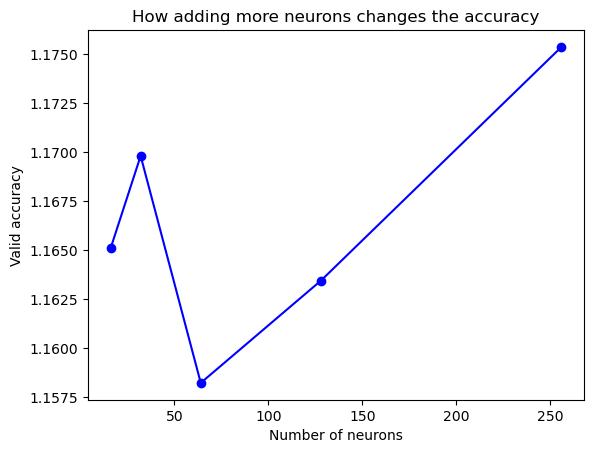

In [73]:
# Define a function to create the model
def create_model(num_neurons):
    input_layer = keras.layers.Input(shape=train_vectors.shape[1:])
    hidden_layer1 = keras.layers.Dense(num_neurons, activation="selu", kernel_initializer="lecun_normal")(input_layer)
    hidden_layer2 = keras.layers.Dense(num_neurons, activation="selu", kernel_initializer="lecun_normal")(hidden_layer1)
    hidden_layer3 = keras.layers.Dense(num_neurons, activation="selu", kernel_initializer="lecun_normal")(hidden_layer2)
    output_layer = keras.layers.Dense(1)(hidden_layer3)
    model = keras.Model(inputs=[input_layer], outputs=[output_layer])
    #model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
    model.compile(loss="mse", optimizer="adam")
    return model

# Define a list of numbers of neurons to experiment with
num_neurons_list = [16, 32, 64, 128, 256]

# Train and evaluate the model for each number of neurons
accuracies = []
for num_neurons in num_neurons_list:
    model = create_model(num_neurons)
    model.fit(train_vectors.toarray(), train_labels, epochs=10, batch_size=32, verbose=0)
    accuracy = model.evaluate(valid_vectors.toarray(), valid_labels, verbose=0)
    accuracies.append(accuracy)
    print(f"Number of neurons: {num_neurons}, Valid accuracy: {accuracy}")

# Plot the graph of how adding more neurons changes the accuracy
plt.plot(num_neurons_list, accuracies, "bo-")
plt.xlabel("Number of neurons")
plt.ylabel("Valid accuracy")
plt.title("How adding more neurons changes the accuracy")
plt.show()

In [8]:
# Creating the NN model
input = keras.layers.Input(shape=train_vectors.shape[1:])
hidden1 = keras.layers.Dense(64, activation = "selu", kernel_initializer="lecun_normal")(input)
hidden2 = keras.layers.Dense(64, activation = "selu", kernel_initializer="lecun_normal")(hidden1)
hidden3 = keras.layers.Dense(64, activation = "selu", kernel_initializer="lecun_normal")(hidden2)
output = keras.layers.Dense(1)(hidden3)

model = keras.Model(inputs=[input], outputs=[output])

In [9]:
# Train the 3Layer NN model
model.compile(loss="mse", optimizer="adam", metrics=["mae"])#keras.optimizers.SGD(learning_rate=1e-3)
history = model.fit(train_vectors.toarray(), train_labels, epochs=20, validation_data=(valid_vectors.toarray(), valid_labels), verbose=0)


4375/4375 [==============================] - 5s 1ms/step - loss: 1.1570 - mae: 0.8492
[1.1569627523422241, 0.849155068397522]


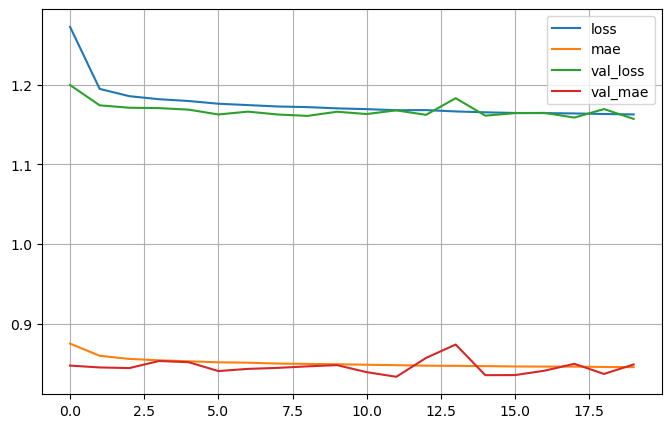

In [10]:
# Evaluate the model on the validation set
mse_valid = model.evaluate(valid_vectors.toarray(), valid_labels)
print(mse_valid)
pd.DataFrame(history.history).plot(figsize=(8, 5)) 
plt.grid(True)

# Make predictions on the validation set
valid_predictions = model.predict(valid_vectors)

# Calculate the mean and standard deviation
mean = np.mean(valid_predictions)
std = np.std(valid_predictions)

print("3Layer NN Mean:", mean)
print("3Layer NN Standard Deviation:", std)

### Deep NN models

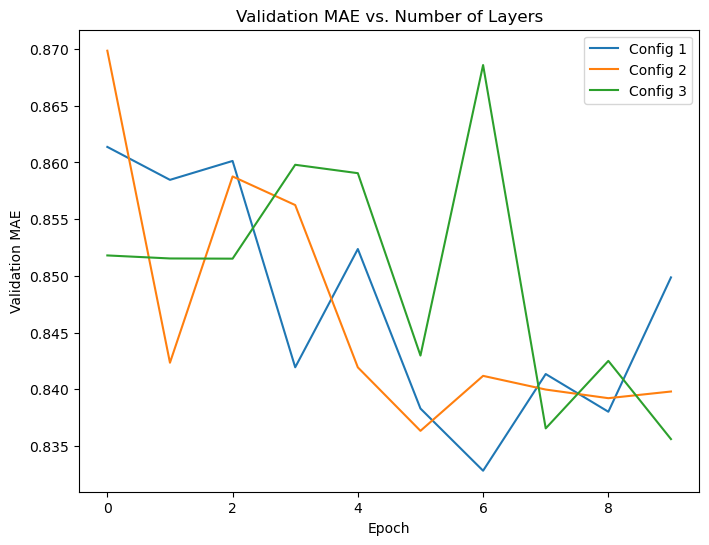

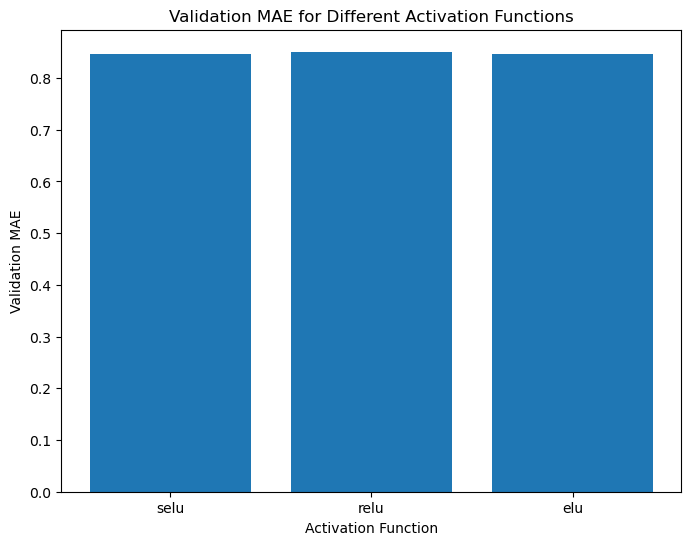

In [86]:
# Define the deep neural network model
def build_model(n_layers, n_neurons, activation):
    input_layer = keras.layers.Input(shape=train_vectors.shape[1:])
    hidden_layers = []
    for i in range(n_layers):
        if i == 0:
            hidden_layers.append(keras.layers.Dense(n_neurons, activation=activation, kernel_initializer="lecun_normal")(input_layer))
        else:
            hidden_layers.append(keras.layers.Dense(n_neurons, activation=activation, kernel_initializer="lecun_normal")(hidden_layers[i-1]))
    output_layer = keras.layers.Dense(1)(hidden_layers[-1])
    model = keras.Model(inputs=[input_layer], outputs=[output_layer])
    return model

# Define a list of configurations to try
configs = [
    {"n_layers": 3, "n_neurons": 64, "activation": "selu"},
    {"n_layers": 4, "n_neurons": 64, "activation": "relu"},
    {"n_layers": 5, "n_neurons": 64, "activation": "elu"}
]

# Train and evaluate models for each configuration
history_list = []
for config in configs:
    model = build_model(**config)
    model.compile(loss="mse", optimizer="adam", metrics=["mae"])
    history = model.fit(train_vectors.toarray(), train_labels, epochs=10, batch_size=32, validation_data=(valid_vectors.toarray(), valid_labels), verbose=0)
    history_list.append(history)

# Plot the validation accuracy vs. number of layers for each configuration
plt.figure(figsize=(8, 6))
for i, history in enumerate(history_list):
    plt.plot(history.history["val_mae"], label=f"Config {i+1}")
plt.xlabel("Epoch")
plt.ylabel("Validation MAE")
plt.title("Validation MAE vs. Number of Layers")
plt.legend()
plt.show()

# Plot the validation MAE for each activation function
activations = ["selu", "relu", "elu"]
mae_list = []
for activation in activations:
    model = build_model(n_layers=3, n_neurons=64, activation=activation)
    model.compile(loss="mse", optimizer="adam", metrics=["mae"])
    history = model.fit(train_vectors.toarray(), train_labels, epochs=10, batch_size=32, validation_data=(valid_vectors.toarray(), valid_labels), verbose=0)
    mae_list.append(history.history["val_mae"][-1])
plt.figure(figsize=(8, 6))
plt.bar(activations, mae_list)
plt.xlabel("Activation Function")
plt.ylabel("Validation MAE")
plt.title("Validation MAE for Different Activation Functions")
plt.show()

In [ ]:
# Creating the Deep NN model
input = keras.layers.Input(shape=train_vectors.shape[1:])
hidden1 = keras.layers.Dense(64, activation = "elu", kernel_initializer="lecun_normal")(input)
hidden2 = keras.layers.Dense(64, activation = "elu", kernel_initializer="lecun_normal")(hidden1)
hidden3 = keras.layers.Dense(64, activation = "elu", kernel_initializer="lecun_normal")(hidden2)
hidden4 = keras.layers.Dense(64, activation = "elu", kernel_initializer="lecun_normal")(hidden3)
hidden5 = keras.layers.Dense(64, activation = "elu", kernel_initializer="lecun_normal")(hidden4)
output = keras.layers.Dense(1)(hidden5)

model = keras.Model(inputs=[input], outputs=[output])


In [ ]:
# Train the 3Layer NN model
model.compile(loss="mse", optimizer="adam", metrics=["mae"])
history = model.fit(train_vectors.toarray(), train_labels, epochs=10, validation_data=(valid_vectors.toarray(), valid_labels), verbose=0)


In [ ]:
# Calculate the mean and standard deviation
mse_valid = model.evaluate(valid_vectors.toarray(), valid_labels)
print(mse_valid)
pd.DataFrame(history.history).plot(figsize=(8, 5)) 
plt.grid(True)

# Make predictions on the validation set
valid_predictions = model.predict(valid_vectors)

# Calculate the mean and standard deviation
mean = np.mean(valid_predictions)
std = np.std(valid_predictions)

print("Deep NN Mean:", mean)
print("Deep NN Standard Deviation:", std)

### Complex NN Models - CNN, LSTM and CNN+LSTM Model

#### Preprocessing Step for the input Vector

In [29]:
# the input in this model take a 3 dimensional array, so we converted our train_vectors in 3 dimensional
#For Train
train_vectors_dense = np.array(train_vectors.toarray())
n_samples, n_features = train_vectors_dense.shape
n_timesteps = 1  # Set the number of timesteps to 1

train_vectors_3d = train_vectors_dense.reshape((n_samples, n_timesteps, n_features))

#For Valid
valid_vectors_dense = np.array(valid_vectors.toarray())
n_samples, n_features = valid_vectors_dense.shape
n_timesteps = 1  # Set the number of timesteps to 1

valid_vectors_3d = valid_vectors_dense.reshape((n_samples, n_timesteps, n_features))

#For Test
test_vectors_dense = np.array(test_vectors.toarray())
n_samples, n_features = test_vectors_dense.shape
n_timesteps = 1  # Set the number of timesteps to 1

test_vectors_3d = test_vectors_dense.reshape((n_samples, n_timesteps, n_features))


#### CNN Model

In [18]:
# Creating the CNN model
input = keras.layers.Input(shape=train_vectors_3d.shape[1:])
conv1d_1 = keras.layers.Conv1D(filters=32, kernel_size=3, padding='same', activation='relu')(input)
maxpool1d_1 = keras.layers.MaxPooling1D(pool_size=2, padding='same')(conv1d_1)
conv1d_2 = keras.layers.Conv1D(filters=32, kernel_size=3, padding='same', activation='relu')(maxpool1d_1)
maxpool1d_2 = keras.layers.MaxPooling1D(pool_size=2, padding='same')(conv1d_2)
flatten = keras.layers.Flatten()(maxpool1d_2)
dense1 = keras.layers.Dense(64, activation='relu')(flatten)
output = keras.layers.Dense(1, activation='sigmoid')(dense1)

model = keras.Model(inputs=[input], outputs=[output])

In [19]:
# Train the CNN model
model.compile(loss="mse", optimizer="adam", metrics=["mae"])
history = model.fit(train_vectors_3d, train_labels, epochs=20, validation_data=(valid_vectors_3d, valid_labels), verbose=0)

4375/4375 [==============================] - 2s 462us/step - loss: 8.7704
8.770400047302246


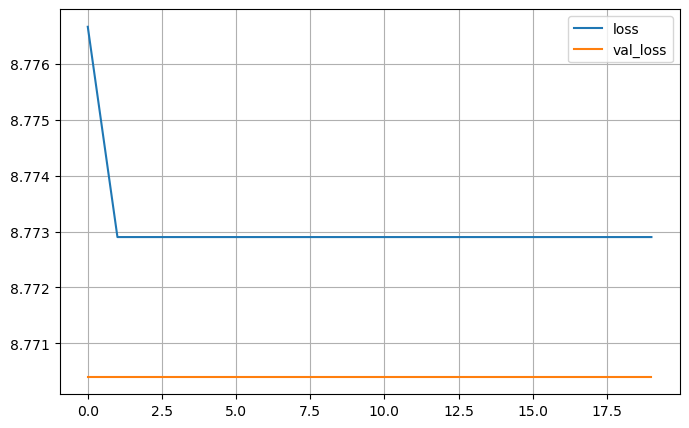

In [20]:
# Evaluate the model on the validation set
mse_valid = model.evaluate(valid_vectors_3d, valid_labels)
print(mse_valid)
pd.DataFrame(history.history).plot(figsize=(8, 5)) 
plt.grid(True)

# Make predictions on the validation set
valid_predictions = model.predict(valid_vectors)

# Calculate the mean and standard deviation
mean = np.mean(valid_predictions)
std = np.std(valid_predictions)

print("CNN Mean:", mean)
print("CNN Standard Deviation:", std)

#### LSTM Model

In [21]:
#Creating the LSTM Model
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense, LSTM

input = keras.layers.Input(shape=train_vectors_3d.shape[1:])
hidden1 = keras.layers.LSTM(20, return_sequences=True)(input)
hidden2 = keras.layers.LSTM(20, return_sequences=True)(hidden1)
output = keras.layers.Dense(1)(hidden2)

model_final = keras.Model(inputs=[input], outputs=[output])

In [22]:
# Train the LSTM model
model_final.compile(loss="mse", optimizer="adam", metrics=["mae"])
history = model_final.fit(train_vectors_3d, train_labels, epochs=20, validation_data=(valid_vectors_3d, valid_labels), verbose=0)

4375/4375 [==============================] - 3s 636us/step - loss: 1.1519
1.1518534421920776


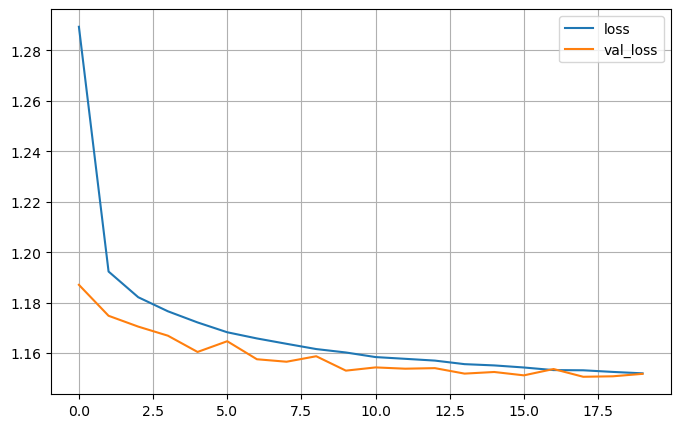

In [23]:
# Evaluate the model on the validation set
mse_valid = model_final.evaluate(valid_vectors_3d, valid_labels)
print(mse_valid)
pd.DataFrame(history.history).plot(figsize=(8, 5)) 
plt.grid(True)

# Make predictions on the validation set
valid_predictions = model_final.predict(valid_vectors)

# Calculate the mean and standard deviation
mean = np.mean(valid_predictions)
std = np.std(valid_predictions)

print("LSTM Mean:", mean)
print("LSTM Standard Deviation:", std)

#### CNN+LSTM Model

In [31]:
#Creating the CNN+LSTM Model
input = keras.layers.Input(shape=train_vectors_3d.shape[1:])
conv1d = keras.layers.Conv1D(filters=32, kernel_size=3, padding='same', activation='relu')(input)
hidden1 = keras.layers.LSTM(20, return_sequences=True)(conv1d)
hidden2 = keras.layers.LSTM(20, return_sequences=True)(hidden1)
output = keras.layers.Dense(1)(hidden2)

model = keras.Model(inputs=[input], outputs=[output])

In [39]:
# Train the CNN+LSTM model
model.compile(loss="mse", optimizer="adam", metrics=["mae"])#keras.optimizers.SGD(learning_rate=1e-3)
history = model.fit(train_vectors_3d, train_labels, epochs=3, validation_data=(valid_vectors_3d, valid_labels), verbose=0)

4375/4375 [==============================] - 5s 1ms/step - loss: 0.8778
0.8777704834938049


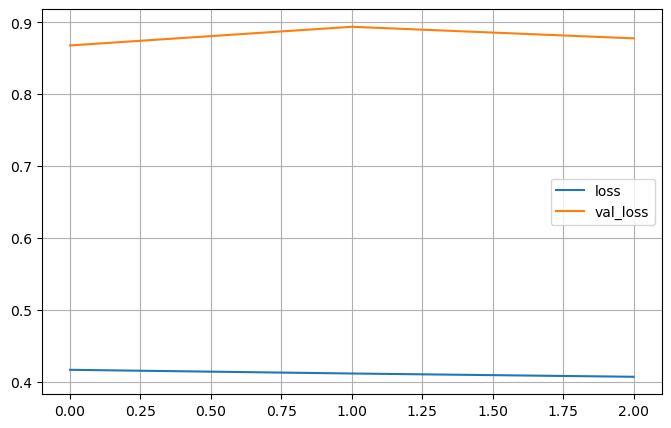

In [40]:
# Evaluate the model on the validation set
mse_valid = model.evaluate(valid_vectors_3d, valid_labels)
print(mse_valid)
pd.DataFrame(history.history).plot(figsize=(8, 5)) 
plt.grid(True)

# Make predictions on the validation set
valid_predictions = model.predict(valid_vectors)

# Calculate the mean and standard deviation
mean = np.mean(valid_predictions)
std = np.std(valid_predictions)

print("CNN Mean:", mean)
print("CNN Standard Deviation:", std)

### Submitting the file to Kaggle Competition

In [41]:
y_pred_test = model_final.predict(test_vectors_3d)
y_pred_test

6250/6250 [==============================] - 8s 1ms/step


array([[[3.1014104]],

       [[4.591178 ]],

       [[4.7716227]],

       ...,

       [[4.253668 ]],

       [[3.8271875]],

       [[4.09772  ]]], dtype=float32)

In [42]:
y_pred_test_round_int = np.round(y_pred_test).astype(int)
y_pred_test_round_int

array([[[3]],

       [[5]],

       [[5]],

       ...,

       [[4]],

       [[4]],

       [[4]]])

In [43]:
test_data_read = pd.read_csv('/Users/patel/Downloads/cs985-cs987-goodread-class-project/my_goodreads_test.csv')
output_pred = pd.DataFrame({"review_id":test_data_read.review_id.astype(str),"rating":y_pred_test_round_int.flatten().flatten()})
output_pred.to_csv("submissionCNNLSTM.csv",index=False)